# Music Genere Classification

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Analysis & Visualization

In [83]:
df = pd.read_csv("train (1).csv")

In [84]:
df.head()

Id          Artist Name       Track Name  Popularity  danceability  energy  \
0   1    Marina Maximilian       Not Afraid        37.0         0.334   0.536   
1   2       The Black Keys  Howlin' for You        67.0         0.725   0.747   
2   3  Royal & the Serpent          phuck u         NaN         0.584   0.804   
3   4   Detroit Blues Band      Missing You        12.0         0.515   0.308   
4   5         Coast Contra          My Lady        48.0         0.565   0.777   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   9.0    -6.649     0       0.0381      0.378000               NaN   
1  11.0    -5.545     1       0.0876      0.027200            0.0468   
2   7.0    -6.094     1       0.0619      0.000968            0.6350   
3   NaN   -14.711     1       0.0312      0.907000            0.0213   
4   6.0    -5.096     0       0.2490      0.183000               NaN   

   liveness  valence    tempo  duration_in min/ms  time_signature  Class  
0     0.106    0.235  152.429            204947.0               4      9  
1     0.104    0.380  132.921            191956.0               4      6  
2     0.284    0.635  159.953            161037.0               4     10  
3     0.300    0.501  172.472            298093.0               3      2  
4     0.211    0.619   88.311            254145.0               4      5

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

##### As we can see we have multiple null values in three columns, these null values will be a hurdle when we move on to the machine learning step, this is why we will be replacing them with the mean

In [86]:
df.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [87]:
df['Popularity'] = df['Popularity'].fillna(df['Popularity'].mean())
df['key'] = df['key'].fillna(df['key'].mean())
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].mean())

##### now after we have removed the null values let's explore the data

In [88]:
df.drop(['Id'],axis=1).describe()

Popularity  danceability        energy           key      loudness  \
count  14396.000000  14396.000000  14396.000000  14396.000000  14396.000000   
mean      44.525208      0.543105      0.662422      5.953781     -7.900852   
std       17.216285      0.165517      0.235967      3.015874      4.057362   
min        1.000000      0.059600      0.001210      1.000000    -39.952000   
25%       33.000000      0.432000      0.508000      4.000000     -9.538000   
50%       44.000000      0.545000      0.699000      5.953781     -7.013500   
75%       56.000000      0.658000      0.861000      8.000000     -5.162000   
max      100.000000      0.989000      1.000000     11.000000      1.342000   

               mode   speechiness  acousticness  instrumentalness  \
count  14396.000000  14396.000000  14396.000000      14396.000000   
mean       0.640247      0.080181      0.246746          0.178129   
std        0.479944      0.085157      0.310922          0.264206   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004280          0.000295   
50%        1.000000      0.047100      0.081450          0.053400   
75%        1.000000      0.083100      0.432250          0.178129   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  14396.000000  14396.000000  14396.000000        1.439600e+04   
mean       0.195782      0.486379    122.695372        2.000942e+05   
std        0.159258      0.239476     29.538490        1.116891e+05   
min        0.011900      0.021500     30.557000        5.016500e-01   
25%        0.097275      0.299000     99.799000        1.654458e+05   
50%        0.129000      0.480500    120.060000        2.089410e+05   
75%        0.256000      0.672000    141.988250        2.522470e+05   
max        0.992000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    14396.000000  14396.000000  
mean         3.924354      6.695679  
std          0.359520      3.206170  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

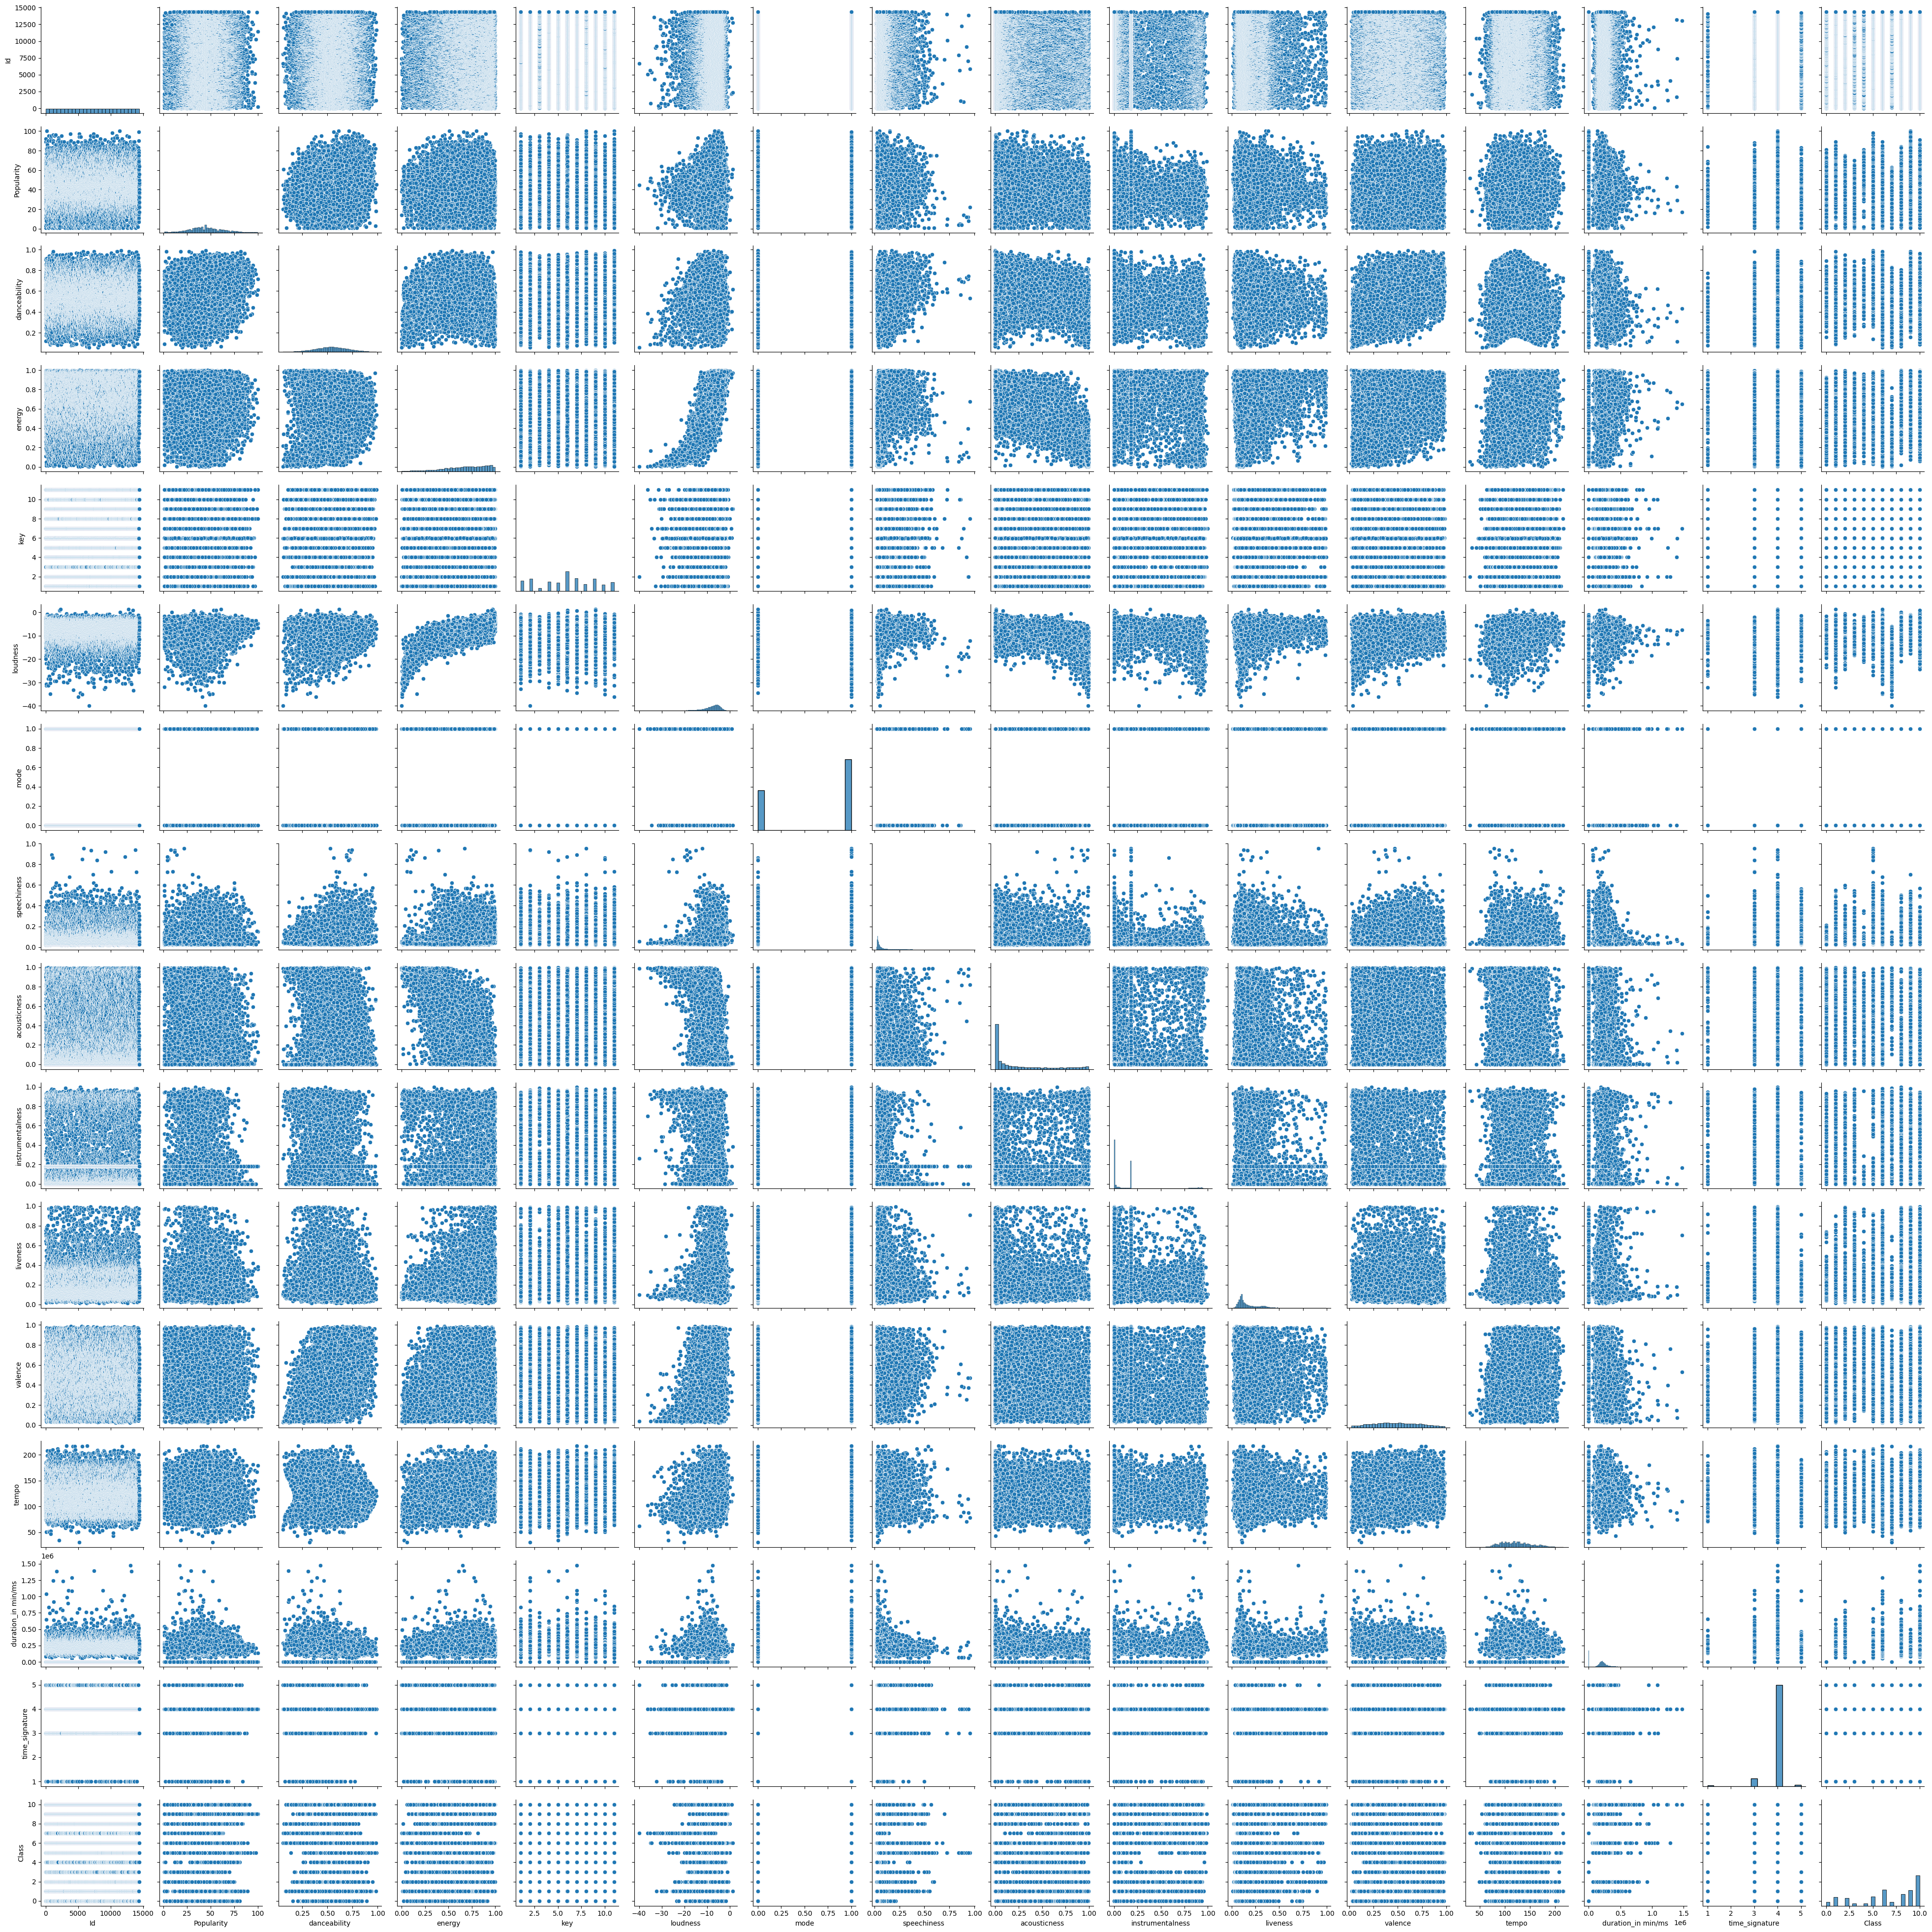

In [8]:
sns.pairplot(df)

##### Let's explore the outliers in the data

In [89]:
numerical_columns = [
    'Popularity', 'danceability', 'energy', 'key', 
    'loudness', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_in min/ms']

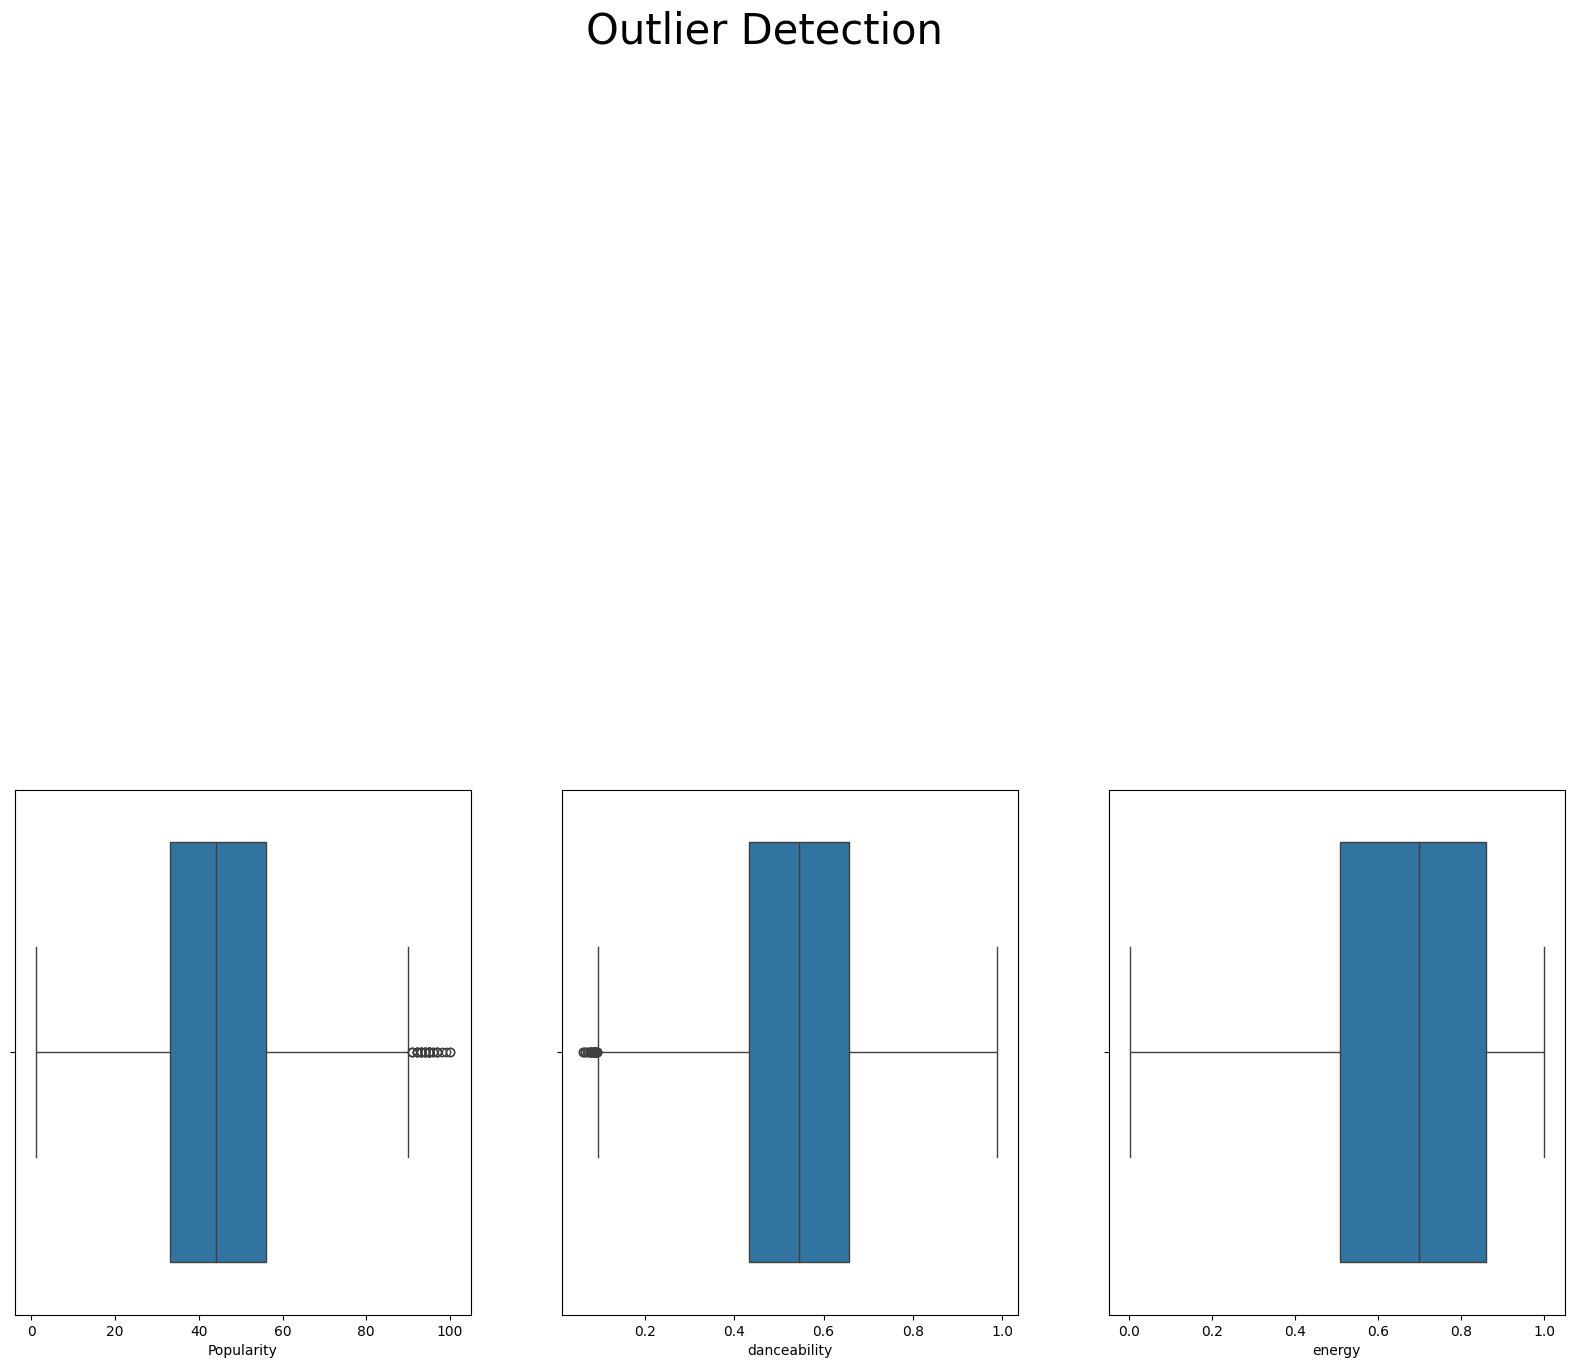

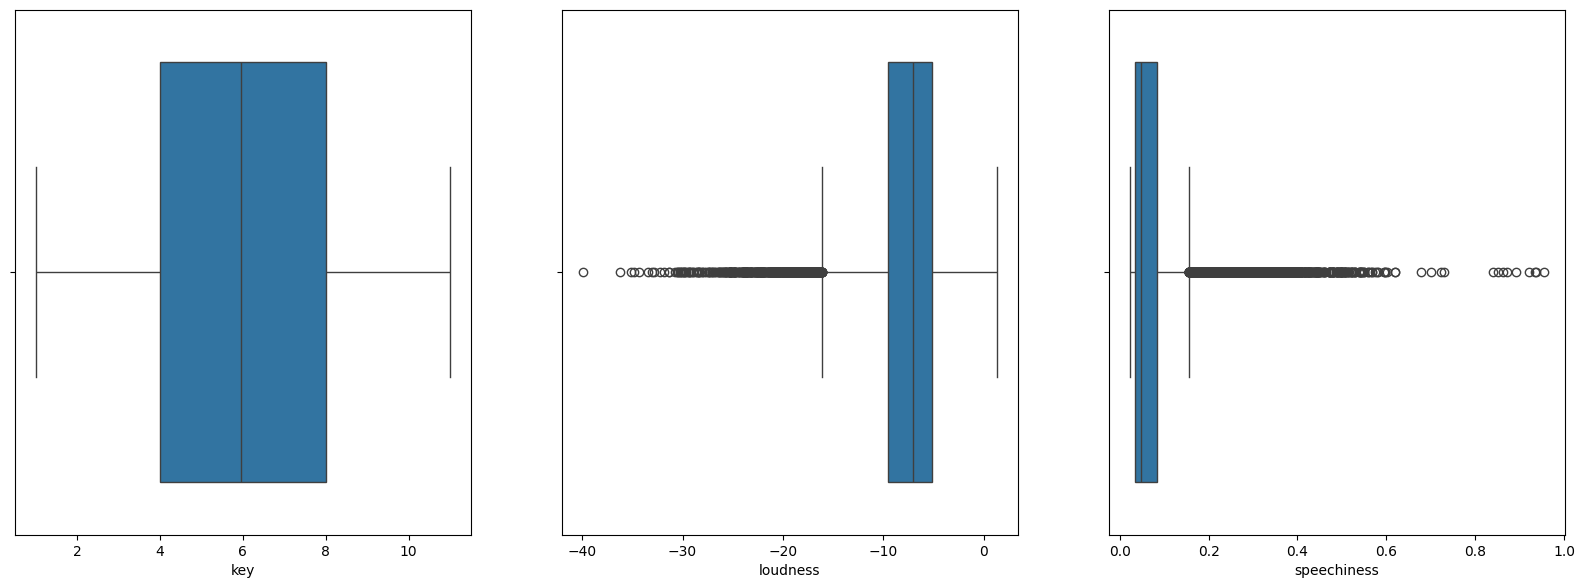

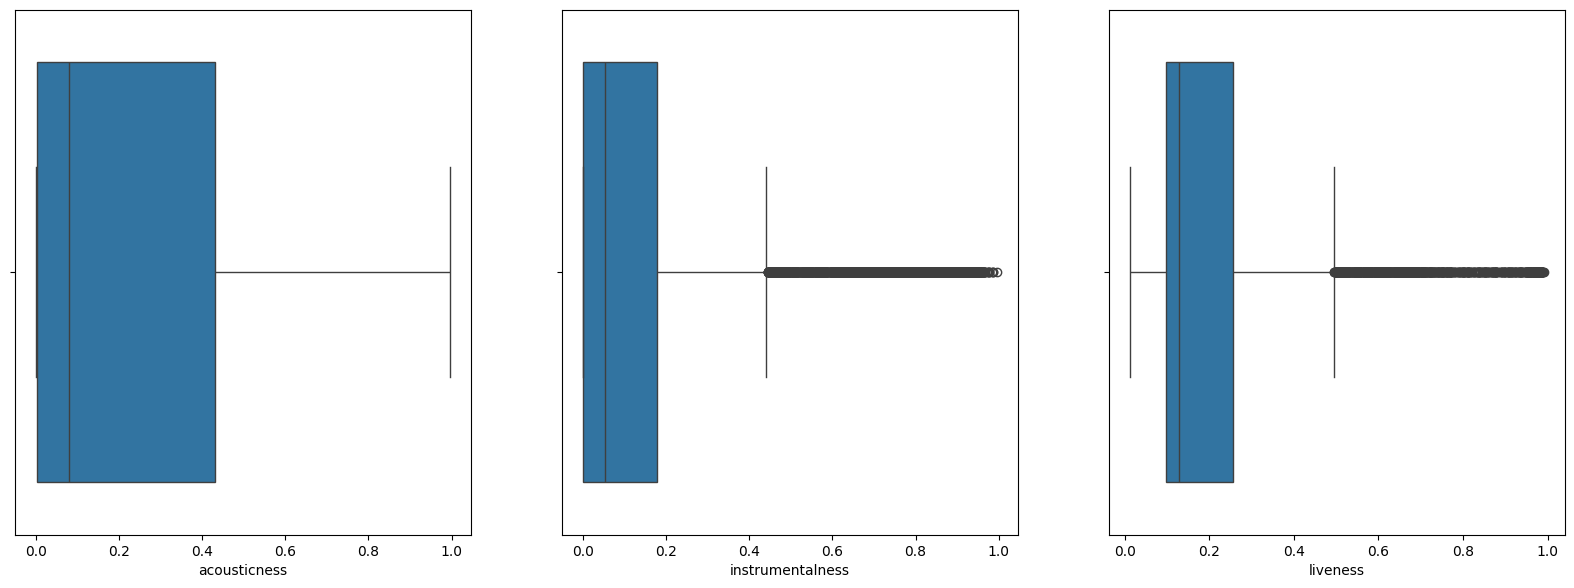

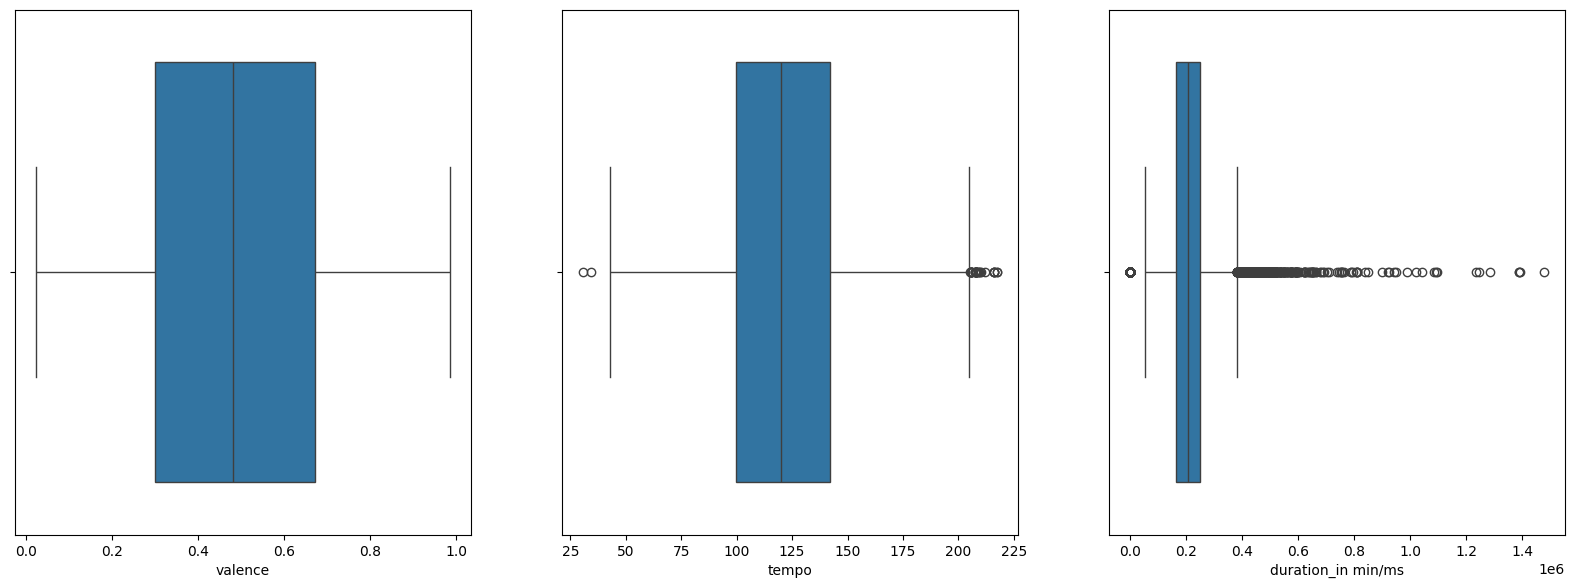

<Figure size 2000x1500 with 0 Axes>

In [90]:
ix=1
fig = plt.figure(figsize = (20,15))
fig.suptitle('Outlier Detection',fontsize=30)
for c in numerical_columns:
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(data=df, x=c)
            
    ix += 1
    if ix == 4: 
        fig = plt.figure(figsize = (20,15))
        ix = 1
plt.show()

## Feature Engineering

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [92]:
df = df.drop(['Id', 'Track Name', 'Artist Name'], axis=1)

<Axes: >

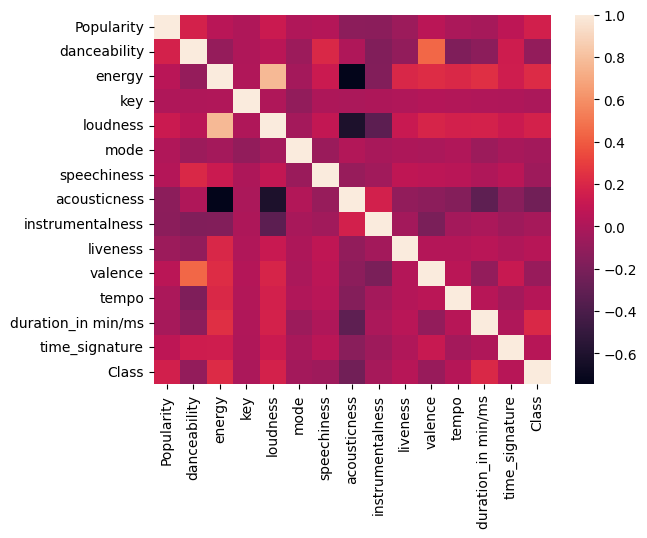

In [93]:
sns.heatmap(df.corr())

In [94]:
x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y)

## Classification Models

##### After multiple iterations, we've found out the top 4 performing models

In [95]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,\
                             HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,\
                            precision_score, recall_score, ConfusionMatrixDisplay

In [96]:
model_dict = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [97]:
model_name = []

model_cv = []
# model_roc = []
model_accuracy = []
# model_f1_score = []
model_precision_score = []
model_recall_score = []

model_ypred = []

kfold = KFold(n_splits=10, shuffle=True)

for i in model_dict:
    model = model_dict[i]
    scores = cross_val_score(model, x_train, y_train, cv=kfold)    
    model.fit(x_train,y_train)
    
    model_name.append(i)
    model_cv.append(np.mean(scores))
    
    y_pred = model.predict(x_test)
    model_ypred.append(y_pred)
    
    model_accuracy.append(accuracy_score(y_test,y_pred))

In [98]:
dict_model_info = {
    'Cross Validation Score':model_cv,
    'Accuracy Score':model_accuracy,
}

df_model_eva = pd.DataFrame(dict_model_info, index=model_name)
df_model_eva.sort_values(['Cross Validation Score','Accuracy Score'],
                         axis=0, ascending=False, inplace=True)
df_model_eva

Cross Validation Score  Accuracy Score
GradientBoostingClassifier                    0.537002        0.520978
HistGradientBoostingClassifier                0.518202        0.517644
RandomForestClassifier                        0.514773        0.495138
XGBClassifier                                 0.511897        0.502362

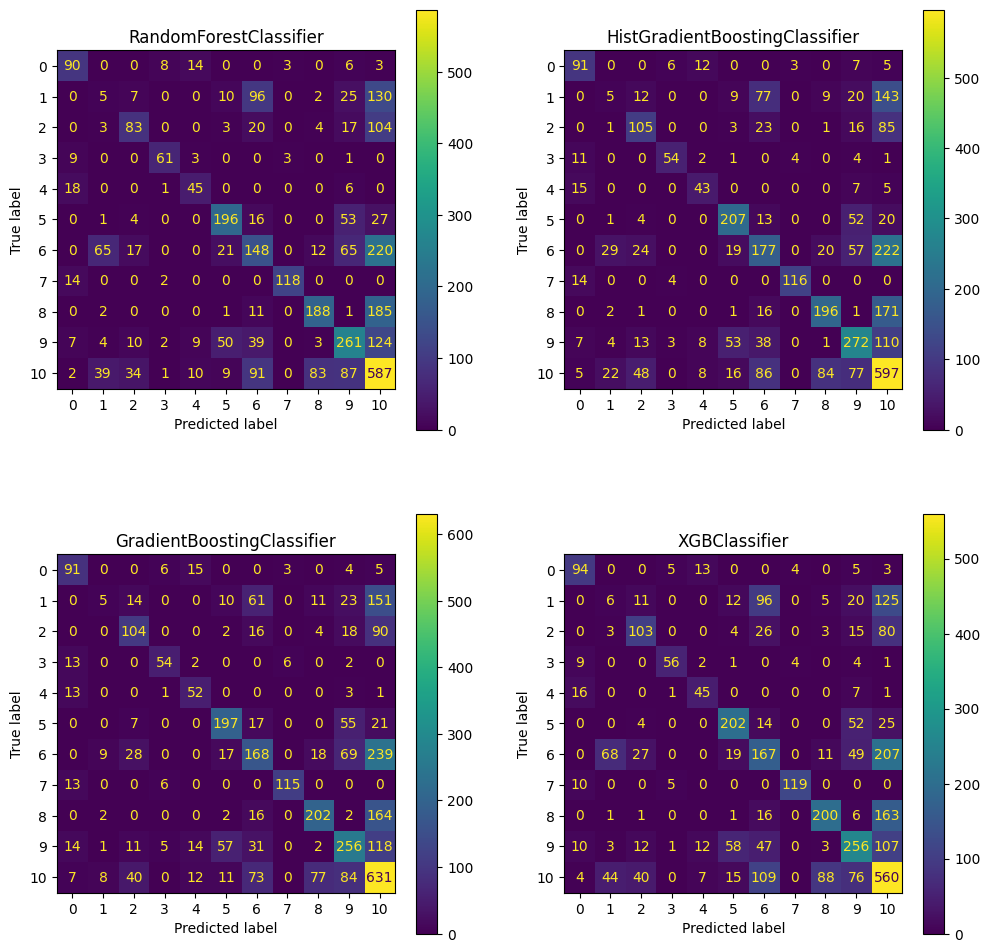

In [99]:
fig, axes = plt.subplots(2,2, figsize = (12,12))

index1=0
index2=0
for i in model_dict:
    if index1>1:
        index2 += 1
        index1 = 0 
    model=model_dict[i]
    ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(x_test))).plot(ax=axes[index1,index2])
    
    axes[index1,index2].set_title(i)
    index1+=1
plt.show()

## Predicting With the Top Performing Model

In [100]:
test = pd.read_csv("test (2).csv")
test.head()

Id      Artist Name                    Track Name  Popularity  \
0  14397  Juan Pablo Vega  Matando (feat. Vic Mirallas)         NaN   
1  14398        Kappi Kat                       Baarish        14.0   
2  14399  Plain White T's             Hey There Delilah        80.0   
3  14400    WALK THE MOON              Different Colors        52.0   
4  14401            Peled                      ◊ß◊®◊ô◊ñ        23.0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.691   0.670  2.0    -7.093     0       0.0941      0.075700   
1         0.461   0.777  2.0    -7.469     1       0.0306      0.388000   
2         0.656   0.291  2.0   -10.572     1       0.0293      0.872000   
3         0.480   0.826  NaN    -4.602     1       0.0397      0.000797   
4         0.734   0.729  1.0    -6.381     0       0.2830      0.147000   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.035200    0.1970    0.635   89.965            200000.0   
1          0.923000    0.2910    0.525  163.043            283909.0   
2               NaN    0.1140    0.298  103.971            232533.0   
3          0.000001    0.1250    0.687   96.000            222053.0   
4               NaN    0.0672    0.805   76.030            118439.0   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [106]:
test.isnull().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [107]:
test['Popularity'] = test['Popularity'].fillna(test['Popularity'].mean())
test['key'] = test['key'].fillna(test['key'].mean())
test['instrumentalness'] = test['instrumentalness'].fillna(test['instrumentalness'].mean())

In [108]:
top_model = model_dict['GradientBoostingClassifier']

In [109]:
top_model

GradientBoostingClassifier()

In [111]:
predictions = top_model.predict(test.drop(['Id', 'Artist Name', 'Track Name'], axis=1))

In [124]:
submission = pd.DataFrame(columns=['Id','Class'])

In [126]:
submission['Id'] = test['Id']
submission['Class'] = predictions

In [127]:
submission

Id  Class
0     14397      9
1     14398      6
2     14399      9
3     14400     10
4     14401      5
...     ...    ...
3595  17992     10
3596  17993      5
3597  17994      6
3598  17995      2
3599  17996     10

[3600 rows x 2 columns]

In [128]:
submission.to_csv('sub_by_zaid.csv',index_label=False)